# Box Office Revenue Prediction.

## Vitaly Pankratov 961152147
## Eden Bar 318471208

### Link to the github: https://github.com/Stayermax/BORP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from  copy import deepcopy
from collections import OrderedDict
from ast import literal_eval
from sklearn.ensemble import RandomForestRegressor

In [2]:
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"]=18,18

# Exploratory Data Analysis

In [3]:
train_df = pd.read_csv('data/train.tsv', sep='\t')
train_df.head(3)

,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Keywords,cast,crew
0,/7IBpOrw0ATwL1AOV97mtsceDpYs.jpg,"{'id': 556, 'name': 'Spider-Man Collection', '...",258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",https://www.sonypictures.com/movies/spiderman3,559,tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,22.024,/2N9lhZg6VtVJoGCZDjXVC3a81Ea.jpg,"[{'id': 19551, 'logo_path': '/2WpWp9b108hizjHK...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-01,890871626,139.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,False,6.2,8180,"[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de..."
1,/lYeE7k0OR3HXyoq7FeswyaxFJvL.jpg,"{'id': 256296, 'name': 'Silent Night, Deadly N...",250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,50719,tt0093974,en,"Silent Night, Deadly Night Part 2",After being traumatized by his brother Billy's...,4.756,/64ATtm2eMd0yfrTJsHANQ0NmMSn.jpg,"[{'id': 18924, 'logo_path': None, 'name': 'Sil...","[{'iso_3166_1': 'US', 'name': 'United States o...",1987-04-10,154323,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The nightmare is about to begin ... AGAIN!,"Silent Night, Deadly Night Part 2",False,4.3,68,"[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'cast_id': 1000, 'character': 'Ricky Caldwel...","[{'credit_id': '52fe47d4c3a36847f814a70f', 'de..."
2,/gVXLIfMR2hLmkn0nACctlMCJBfx.jpg,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",https://www.scottymovie.com/,469062,tt2773246,en,Scotty and the Secret History of Hollywood,A deliciously scandalous portrait of unsung Ho...,4.746,/2uXDNXBoIrRBbfpVrvegoLr8OVt.jpg,"[{'id': 88564, 'logo_path': '/pn3p12IC4Tb0K8re...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-07-27,176236,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Scotty and the Secret History of Hollywood,False,6.5,15,"[{'id': 158718, 'name': 'lgbt'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '5980e931c3a3680cfb002d0e', 'de..."


In [4]:
test_df = pd.read_csv('data/train.tsv', sep='\t')
test_df.head(3)

,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Keywords,cast,crew
0,/7IBpOrw0ATwL1AOV97mtsceDpYs.jpg,"{'id': 556, 'name': 'Spider-Man Collection', '...",258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",https://www.sonypictures.com/movies/spiderman3,559,tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,22.024,/2N9lhZg6VtVJoGCZDjXVC3a81Ea.jpg,"[{'id': 19551, 'logo_path': '/2WpWp9b108hizjHK...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-01,890871626,139.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,False,6.2,8180,"[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de..."
1,/lYeE7k0OR3HXyoq7FeswyaxFJvL.jpg,"{'id': 256296, 'name': 'Silent Night, Deadly N...",250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,50719,tt0093974,en,"Silent Night, Deadly Night Part 2",After being traumatized by his brother Billy's...,4.756,/64ATtm2eMd0yfrTJsHANQ0NmMSn.jpg,"[{'id': 18924, 'logo_path': None, 'name': 'Sil...","[{'iso_3166_1': 'US', 'name': 'United States o...",1987-04-10,154323,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The nightmare is about to begin ... AGAIN!,"Silent Night, Deadly Night Part 2",False,4.3,68,"[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'cast_id': 1000, 'character': 'Ricky Caldwel...","[{'credit_id': '52fe47d4c3a36847f814a70f', 'de..."
2,/gVXLIfMR2hLmkn0nACctlMCJBfx.jpg,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",https://www.scottymovie.com/,469062,tt2773246,en,Scotty and the Secret History of Hollywood,A deliciously scandalous portrait of unsung Ho...,4.746,/2uXDNXBoIrRBbfpVrvegoLr8OVt.jpg,"[{'id': 88564, 'logo_path': '/pn3p12IC4Tb0K8re...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-07-27,176236,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Scotty and the Secret History of Hollywood,False,6.5,15,"[{'id': 158718, 'name': 'lgbt'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '5980e931c3a3680cfb002d0e', 'de..."


As you can see, some fields are represented as dictionaries or list of dictionaries.

During data preprocessing we will change those fields and update it's values.

### Dataset features

Let's check, what information we can get from dataframes:

In [5]:
train_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,5.215000e+03,5215.000000,5215.000000,5.215000e+03,5211.000000,5215.000000,5215.000000
mean,2.147967e+07,98768.673442,10.016559,6.538743e+07,108.027442,6.399099,1062.859636
std,3.631509e+07,143992.708567,7.075799,1.432381e+08,22.740973,0.943931,2097.172266
min,0.000000e+00,5.000000,1.519000,1.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,10136.000000,6.264000,2.360718e+06,94.000000,5.900000,74.000000
50%,6.500000e+06,24662.000000,9.009000,1.515620e+07,104.000000,6.400000,290.000000
75%,2.600000e+07,121704.000000,11.801000,6.214247e+07,118.000000,7.100000,1028.000000
max,3.800000e+08,679106.000000,151.237000,2.046240e+09,465.000000,10.000000,24834.000000


In [6]:
train_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,5.215000e+03,5215.000000,5215.000000,5.215000e+03,5211.000000,5215.000000,5215.000000
mean,2.147967e+07,98768.673442,10.016559,6.538743e+07,108.027442,6.399099,1062.859636
std,3.631509e+07,143992.708567,7.075799,1.432381e+08,22.740973,0.943931,2097.172266
min,0.000000e+00,5.000000,1.519000,1.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,10136.000000,6.264000,2.360718e+06,94.000000,5.900000,74.000000
50%,6.500000e+06,24662.000000,9.009000,1.515620e+07,104.000000,6.400000,290.000000
75%,2.600000e+07,121704.000000,11.801000,6.214247e+07,118.000000,7.100000,1028.000000
max,3.800000e+08,679106.000000,151.237000,2.046240e+09,465.000000,10.000000,24834.000000


One can notice, that budget and runtime obtain zero values both in train and in test dataframe, which is hardly possible in the real world. 

Also minimal revenue in both dataframes is equal to 1, which also strange. 

We will deal with missing values in the future sections.


### Feature distribution

To explore the relationship between features we gonna build correlation matrix and pairplot

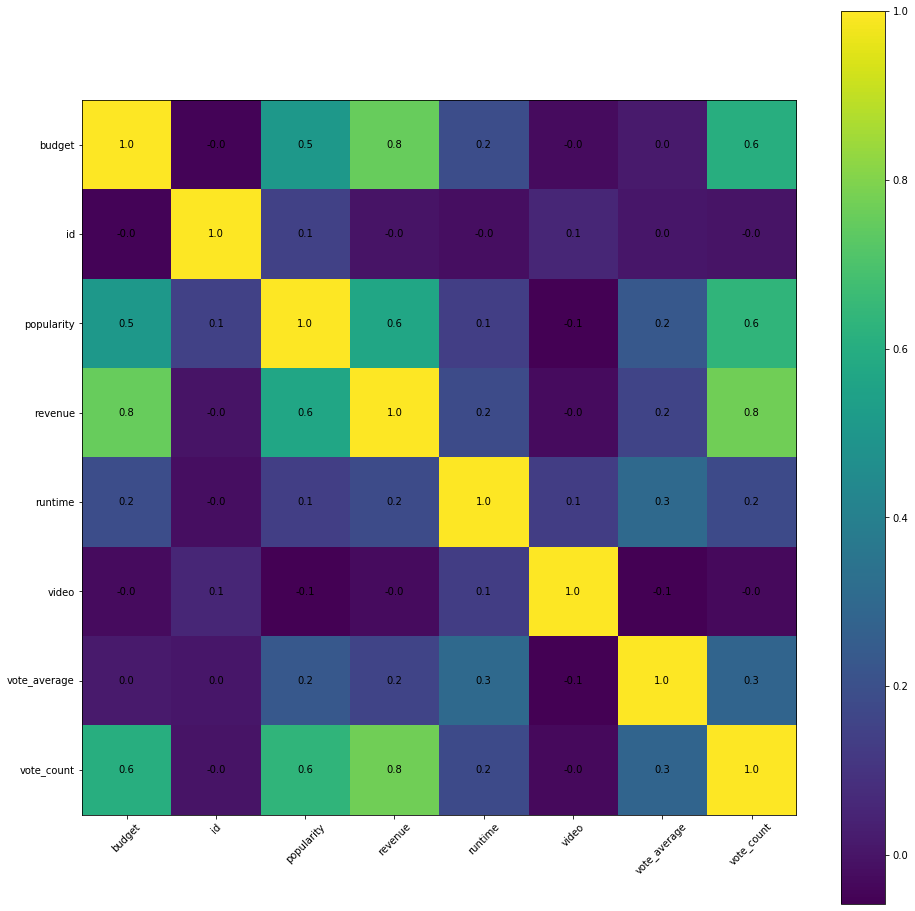

In [7]:
PLT_5 = plt.matshow(train_df.corr())
plt.xticks(range(len(train_df.corr())), train_df.corr().columns)
plt.yticks(range(len(train_df.corr())), train_df.corr().columns)
ax = plt.gca()
ax.xaxis.tick_bottom()
plt.colorbar()
plt.xticks(rotation=45)
for (i, j), z in np.ndenumerate(train_df.corr()):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

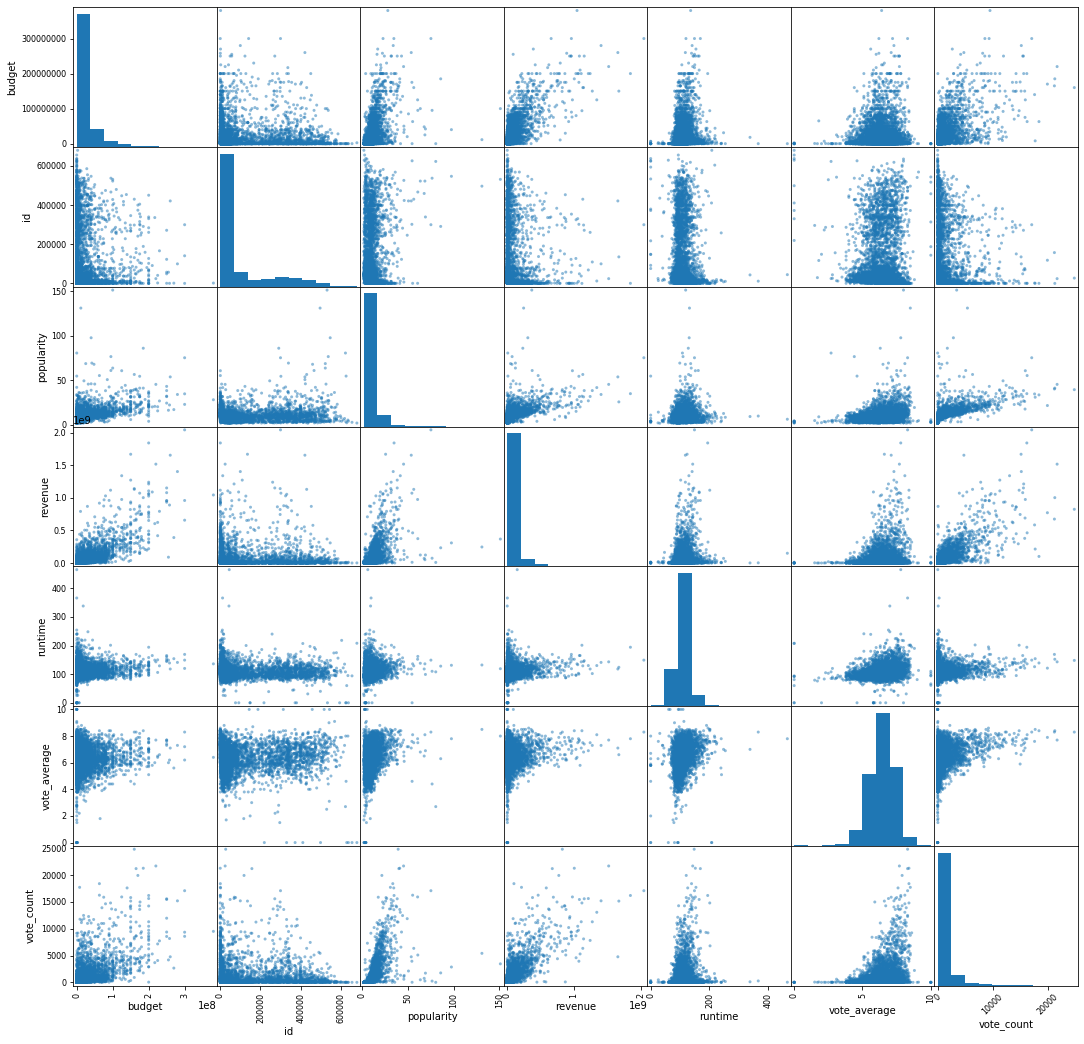

In [8]:
numerical_df = train_df[['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']]
pd.plotting.scatter_matrix(numerical_df)
# PLT_pairs = sns.pairplot(numerical_df, kind='reg')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

From the correlation matrix, we noticed, that budget, popularity and vote_count have hight correlation with revenue and we will use this, when we will create features for the regression models.

### Missing data

As we already detected we have missing values in budget and runtime fields.
But we are also interested in finding misses in other, not numerical field.

First of all let's find out number of zeros in budget and runtime fields:

In [9]:
for col in train_df.columns:
    print(f"{col}: {len(train_df[col]) - np.count_nonzero(train_df[col])}")

backdrop_path: 0
belongs_to_collection: 0
budget: 1487
genres: 0
homepage: 0
id: 0
imdb_id: 0
original_language: 0
original_title: 0
overview: 0
popularity: 0
poster_path: 0
production_companies: 0
production_countries: 0
release_date: 0
revenue: 0
runtime: 12
spoken_languages: 0
status: 0
tagline: 0
title: 0
video: 5197
vote_average: 9
vote_count: 8
Keywords: 0
cast: 0
crew: 0


##### Fields with zeros:
video - all values are the same and we won't use this field.

vote_count and vote_average can be 0 if nobody have watched the film or graded it with 0.

Almost 30% of budgets data is missing, hence it hardly possible to restore those values. 

However in case of runtime we can try to restore zero values somehow, since only 12 samples from 5150 are absent.

Now we can look at the rest of the fields:

In [10]:
train_df.isnull().sum()

backdrop_path             577
belongs_to_collection    4150
budget                      0
genres                      0
homepage                 3449
id                          0
imdb_id                    15
original_language           0
original_title              0
overview                    6
popularity                  0
poster_path               167
production_companies        0
production_countries        0
release_date                0
revenue                     0
runtime                     4
spoken_languages            0
status                      0
tagline                  1025
title                       0
video                       0
vote_average                0
vote_count                  0
Keywords                    0
cast                        0
crew                        0
dtype: int64

#### Let's take a look at missing fields in the data:

backdrop_path - is the path to movie backdrop image and we won't use it in our research.

belongs_to_collection - Name and id of film collection (series) that include the movie. Since 4/5 of the whole dataset doesn't have collection, we can coclude that it is not restorable data. However, we can think of relation between movies inside some collection and movies without collection. Hence, in the next part we will replace this field with indicator that shows is movie belongs to some colllection

imdb_id - id on the imdb syte. We won't use this field.

poster_path - is the path to movie poster image and we won't use it in our research.

tagline - is the tagline of the movie. Since about 20% of this field is missing and field is textual, it's impossible to restore it's value. Hence, we will drop it or replace with indicator, like we did with belongs_to_collection.

### Till now we searched for missing values in train dataset. But as you can see, test_df lack the same fields:

In [11]:
test_df.isnull().sum()

backdrop_path             577
belongs_to_collection    4150
budget                      0
genres                      0
homepage                 3449
id                          0
imdb_id                    15
original_language           0
original_title              0
overview                    6
popularity                  0
poster_path               167
production_companies        0
production_countries        0
release_date                0
revenue                     0
runtime                     4
spoken_languages            0
status                      0
tagline                  1025
title                       0
video                       0
vote_average                0
vote_count                  0
Keywords                    0
cast                        0
crew                        0
dtype: int64

Since some of the fields are dictionaries or lists, there also can be empty values, but in those case we will handle this during features creation.

## Some service functions before we feachers engineering

In [12]:
def __generateGenresDict(data):
    """
    Generates dictionary of all genres with it's id as key.
    :param df:
    :return:
    """
    res = {}
    all_genres = data['genres']
    for el in all_genres:
        LoD = strIntoLoD(el)
        for el in LoD:
            if (el['id'] not in res.keys()):
                res[el['id']] = el['name']
    ordered_res = OrderedDict(sorted(res.items(), key=lambda item: item[0]))
    return ordered_res

def __removeUnpopularIds(listOfIds, popularIds):
    """
    :param listOfIds: List of ids
    :param popularIds: Most popular agent over whole population
    :return: listOfIds without agents that aren't popular
    """
    res = []
    for id in listOfIds:
        if (id in popularIds.keys()):
            res.append(id)
    return res


def __topNfromField(listOfIds, popularIds, N=3):
    """

    :param listOfIds: List of ids
    :param popularIds: Most popular agent over whole population
    :param N: Number of best (most popular, profitable, etc.) ids that we return
    :return:
    """
    idPopularity = {}
    for id in listOfIds:
        idPopularity[id] = popularIds[id]
    ordered_agentFilmNumber = OrderedDict(sorted(idPopularity.items(), key=lambda item: item[1], reverse=True))
    topN = [el[0] for el in list(ordered_agentFilmNumber.items())[:N]]
    return topN


def __popularityFromField(data, field, threshold=3, topN=-1):
    res = {}
    for ids in data[field]:
        for id in ids:
            if (id in res.keys()):
                res[id] += 1
            else:
                res[id] = 1
    topIds = {}
    for id in res.keys():
        if (res[id] >= threshold):
            topIds[id] = res[id]
    ordered_res = OrderedDict(sorted(topIds.items(), key=lambda item: item[1], reverse=True))

    return ordered_res


def __profitFromField(data, field, threshold_profit=0, topN=-1):
    """
    Return dictionary of id:mean profit of id (topN of ids)
    :param field:
    :param threshold_profit:
    :return:
    """
    res = {}
    for index, row in data.iterrows():
        ids = row[field]
        for id in ids:
            if (id in res.keys()):
                res[id]['profit'] += row['revenue']
                res[id]['movies_num'] += 1
            else:
                res[id] = {'profit': row['revenue'], 'movies_num': 1}
    topIds = {}

    for id in res.keys():
        if (res[id]['profit'] / res[id]['movies_num'] >= threshold_profit):
            topIds[id] = res[id]['profit'] / res[id]['movies_num']

    ordered_res = OrderedDict(sorted(topIds.items(), key=lambda item: item[1], reverse=True)[:topN])
    # print(f'Top keywords: {ordered_res}')
    return ordered_res


def __generateAgentIdsDict(data, field):
    """

    :param field: string LoD
    :return: dictionary
    """
    res = {}
    field_data = data[field].apply(strIntoLoD).values
    for row in field_data:
        for el in row:
            res[el['id']] = el['name']
    return res


def __getProfictCategory(value, bins):
    category = 0

    if (value <= bins[0]):
        return 0
    elif (value > bins[-1]):
        return len(bins) - 1
    else:
        for i, bin in enumerate(bins):
            if (i != 0):
                if (value > bins[i - 1] and value <= bins[i]):
                    return i - 1


def getDirector(LoD, nameOrId):
    for d in LoD:
        if (d['job'] == 'Director'):
            return d[nameOrId]
    if (nameOrId == 'name'):  # In case that we don't know who director is
        return 'Vitaly Pankratov'
    else:
        return -1


def averageIfZero(budget, year, yearAverageBudgetDict):
    if (budget == 0):
        if (year in yearAverageBudgetDict.keys()):
            return yearAverageBudgetDict[year]
        else:
            closest_year_plus = year
            closest_year_minus = year
            while ((closest_year_plus not in yearAverageBudgetDict.keys())
                   and (closest_year_minus not in yearAverageBudgetDict.keys())):
                closest_year_plus += 1
                closest_year_minus -= 1
            if (closest_year_plus in yearAverageBudgetDict.keys()):
                return yearAverageBudgetDict[closest_year_plus]
            else:
                return yearAverageBudgetDict[closest_year_minus]
    else:
        return budget


def dictOrNaN(DoN):
    if (type(DoN) == type(8.5)):
        return {'id': -1, 'name': 'No Collection'}
    else:
        return literal_eval(DoN)


def strIntoLoD(string):
    """
    :param string: string format: [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}]
    :return:
    """
    if (string[0] == '['):
        string = string[1:-1]
    LIST = string.split('}, ')
    res = []
    for i, el in enumerate(LIST):
        if (len(el) == 0):
            continue
        if (i != len(LIST) - 1):
            el = el + '}'
        res.append(literal_eval(el))
    return res


def getIDsFromListofDicts(LoD):
    """

    :param LoD: list of dictionaries [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}]
    :return: ids from this list
    """
    res = [el['id'] for el in LoD]
    return res

# Feature Engineering

dataCleaning function clean dataframe from excess columns and creates features fields.

We will apply this function on train_df and test_df and then will explain obtained results.

In [13]:
def dataCleaning(data, train=True, pretrained_data={}):

    if (train != True):
        mostProfitableActors = pretrained_data['mostProfitableActors']  # Ordered Dict actor id: actor mean proffit
        dir_bins = pretrained_data['dir_bins']  # List directors bins by profit
        yearMeanRevenue = pretrained_data['yearMeanRevenue']  # Dict year: year mean revenue
        directorProfit = pretrained_data['directorProfit']  # Dict director id : director mean profit
        topKeywords = pretrained_data['topKeywords']  # Ordered Dict keyword id: keyword film number
        keywordProfit = pretrained_data['keywordProfit']  # Ordered Dict keyword id: keyword mean profit
        mostProductiveCompanies = pretrained_data[
            'mostProductiveCompanies']  # Ordered Dict Company Id: Number of company films
        companiesIds = pretrained_data['companiesIds']  # Dict Company Id : Company Name
    else:
        genres_dict = __generateGenresDict(data)

        
    # Genres
    data['genresIDs'] = data['genres'].apply(strIntoLoD)
    data['genresIDs'] = data['genresIDs'].apply(getIDsFromListofDicts)

    # Production companies
    data['prodCompIDs'] = data['production_companies'].apply(strIntoLoD)
    data['prodCompIDs'] = data['prodCompIDs'].apply(getIDsFromListofDicts)

    # Collection
    data['isInCollection'] = data['belongs_to_collection'].apply(lambda x: int(type(x) != type(0.1)))

    # Year
    data['year'] = data['release_date'].apply(lambda x: x.split('-')[0])
    data['year'] = pd.to_numeric(data["year"])

    # Month
    data['month'] = data['release_date'].apply(lambda x: x.split('-')[1])
    data['month'] = pd.to_numeric(data["month"])
    
#     # Runtime
#     data['runtime'] = pd.to_numeric(data["runtime"])
#     data['runtime'] = data['runtime'].apply(lambda x: x if(x!=0) else data['runtime'].mean())
    

    # revenue by year:
    if (train == True):
        yearMeanRevenue = {}
        for index, row in data[['year', 'revenue']].groupby('year').mean().iterrows():
            yearMeanRevenue[index] = row['revenue']

            # Companies: We took top 10 companies with the biggest number of films
    data['companiesIDs'] = data['production_companies'].apply(strIntoLoD)
    data['companiesIDs'] = data['companiesIDs'].apply(getIDsFromListofDicts)
    if (train == True):
        mostProductiveCompanies = __popularityFromField(data, 'companiesIDs', threshold=0, topN=5)
        companiesIds = __generateAgentIdsDict(data, field='production_companies')
    else:
        # in case of test, mostProductiveCompanies should already be defined
        pass
    data['companiesIDs'] = data['companiesIDs'].apply(lambda x: __removeUnpopularIds(x, mostProductiveCompanies))

    # Most Popular Actors
    data['castIDs'] = data['cast'].apply(strIntoLoD)
    data['castIDs'] = data['castIDs'].apply(getIDsFromListofDicts)
    if (train == True):
        mostProfitableActors = __profitFromField(data, field='castIDs', threshold_profit=0,
                                                 topN=20000)  # Actors with the most number of movies
    else:
        # in case of test, topActors should already be defined
        pass
    data['castIDs'] = data['castIDs'].apply(lambda x: __removeUnpopularIds(x, mostProfitableActors))
    data['castIDs'] = data['castIDs'].apply(lambda x: __topNfromField(x, mostProfitableActors, 40))
    data['topActorsNum'] = data['castIDs'].apply(len)
    # actorIds = __generateAgentIdsDict(field='cast')

    # Director
    data['crew'] = data['crew'].apply(strIntoLoD)
    data['director'] = data['crew'].apply(getDirector, args=('name',))
    data['directorID'] = data['crew'].apply(getDirector, args=('id',))
    # directorIds = dict([(row['directorID'], row['director']) for index, row in data.iterrows()])

    # Director categories:
    if (train):
        directorProfit = data.groupby('directorID').mean()['revenue'].to_dict()
        min_rev = min(directorProfit)
        max_rev = max(directorProfit)
        dir_bins_N = 10
        step = (max_rev - min_rev) / dir_bins_N
        dir_bins = np.arange(min_rev, max_rev, step)

        data['directorCat'] = data['directorID'].apply(
            lambda x: __getProfictCategory(directorProfit[x], dir_bins))
    else:
        # In this case dir_bins_N should be already defined, as well as directorProfit
        data['directorCat'] = data['directorID'].apply(
            lambda x: __getProfictCategory(directorProfit[x], dir_bins) if (x in directorProfit.keys()) else 5)

    # Most Popular keywords
    data['popularKeywordsIDs'] = data['Keywords'].apply(strIntoLoD)
    data['popularKeywordsIDs'] = data['popularKeywordsIDs'].apply(getIDsFromListofDicts)
    if (train == True):
        topKeywords = __popularityFromField(data, field='popularKeywordsIDs',
                                            threshold=3)  # Keywords with the most number of movies
    else:
        # In this case topKeywords should be predefined
        pass
    data['popularKeywordsIDs'] = data['popularKeywordsIDs'].apply(lambda x: __removeUnpopularIds(x, topKeywords))
    data['popularKeywordsIDs'] = data['popularKeywordsIDs'].apply(lambda x: __topNfromField(x, topKeywords, 20))
    # keywordsIds = __generateAgentIdsDict(field='Keywords')

    # Most Profitable Keywords
    data['profitableKeywordsIDs'] = data['Keywords'].apply(strIntoLoD)
    data['profitableKeywordsIDs'] = data['profitableKeywordsIDs'].apply(getIDsFromListofDicts)
    if (train == True):
        keywordProfit = __profitFromField(data, field='profitableKeywordsIDs', threshold_profit=100000,
                                          topN=1000)  # Keywords with biggest mean profits
    else:
        # In this case keywordProfit should be predefined
        pass
    data['profitableKeywordsIDs'] = data['profitableKeywordsIDs'].apply(
        lambda x: __removeUnpopularIds(x, keywordProfit))
    data['profitableKeywordsIDs'] = data['profitableKeywordsIDs'].apply(
        lambda x: __topNfromField(x, keywordProfit, 14))
    data['profitableKeywordsNum'] = data['profitableKeywordsIDs'].apply(len)

    # topNkeyIds = [el[0] for el in list(keywordProfit.items())[:50]]
    # topNWords = []
    # for wid in topNkeyIds:
    #     print([wid, keywordsIds[wid], keywordProfit[wid]])

    to_delete_cols = ['backdrop_path', 'homepage', 'poster_path', 'video',
                      'genres', 'production_companies', 'original_language',
                      'imdb_id', 'tagline', 'status',
                      'belongs_to_collection', 'release_date', 'original_title',
                      'crew', 'cast', 'Keywords', 'production_countries', 
                      'budget', 'spoken_languages', 'overview', 'vote_average' ,
                      'director', 'directorID', 'popularKeywordsIDs','runtime', 'castIDs', 'profitableKeywordsIDs']

    # Delete low data:
    for col in to_delete_cols:
        data.drop(col, axis=1, inplace=True)

    # # show_cols sorted by revenue
    # show_cols = ['revenue', 'title', 'year','directorCat','profitableKeywordsNum']
    # a = data.sort_values('revenue')[show_cols].values
    # for el in a:
    #     print(el)
    trained_data = {}
    if (train == True):
        trained_data['genres_dict'] = genres_dict
        trained_data['mostProfitableActors'] = mostProfitableActors
        trained_data['dir_bins'] = dir_bins
        trained_data['yearMeanRevenue'] = yearMeanRevenue
        trained_data['directorProfit'] = directorProfit
        trained_data['topKeywords'] = topKeywords
        trained_data['keywordProfit'] = keywordProfit
        trained_data['mostProductiveCompanies'] = mostProductiveCompanies
        trained_data['companiesIds'] = companiesIds

    return data, trained_data


In [14]:
clear_train_df, trained_data  = dataCleaning(data=train_df, train=True)

In [15]:
clear_train_df.head()

,id,popularity,revenue,title,vote_count,genresIDs,prodCompIDs,isInCollection,year,month,companiesIDs,topActorsNum,directorCat,profitableKeywordsNum
0,559,22.024,890871626,Spider-Man 3,8180,"[14, 28, 12]","[19551, 5, 326, 34]",1,2007,5,"[19551, 5, 326, 34]",40,9,12
1,50719,4.756,154323,"Silent Night, Deadly Night Part 2",68,"[35, 27]",[18924],1,1987,4,[18924],1,0,1
2,469062,4.746,176236,Scotty and the Secret History of Hollywood,15,[99],[88564],0,2018,7,[88564],1,0,0
3,9003,13.828,14564027,Hellraiser,1115,[27],"[1950, 15338, 15339, 15340]",1,1987,9,"[1950, 15338, 15339, 15340]",1,9,0
4,11153,15.070,61399552,National Lampoon's Vacation,782,"[35, 12]",[174],1,1983,7,[174],2,9,1


In [16]:
clear_test_df, zero_data  = dataCleaning(data=test_df, train=False, pretrained_data=trained_data)

In [17]:
clear_test_df.head()

,id,popularity,revenue,title,vote_count,genresIDs,prodCompIDs,isInCollection,year,month,companiesIDs,topActorsNum,directorCat,profitableKeywordsNum
0,559,22.024,890871626,Spider-Man 3,8180,"[14, 28, 12]","[19551, 5, 326, 34]",1,2007,5,"[19551, 5, 326, 34]",40,9,12
1,50719,4.756,154323,"Silent Night, Deadly Night Part 2",68,"[35, 27]",[18924],1,1987,4,[18924],1,0,1
2,469062,4.746,176236,Scotty and the Secret History of Hollywood,15,[99],[88564],0,2018,7,[88564],1,0,0
3,9003,13.828,14564027,Hellraiser,1115,[27],"[1950, 15338, 15339, 15340]",1,1987,9,"[1950, 15338, 15339, 15340]",1,9,0
4,11153,15.070,61399552,National Lampoon's Vacation,782,"[35, 12]",[174],1,1983,7,[174],2,9,1


Now after we cleaned and prepared our data, we will explain each of clear_train_df and clear_train_df columns

## Features list:

##### Popularity  and vote_count (Numerical features)
As we saw in the first part of the report, there is high correlation between Popularity, vote_count and revenue, hence we use this fields as features.

##### genresIDs ( Categorical value)
Ids of genres that belongs to the movie

##### prodCompIDs  ( Categorical value)
Ids of Video Studios that create the movie. We take into account only top 5 companies with highes number of created films, so if movie was created by small companies, this field would be empty.
Will be interpreted as vector of length 10 with 1 on places corresponding to specific production company.

##### isInCollection (Bool feature)
1 if movie belong to some collection. 0 otherwize

##### year  (Numerical value)
Release year. Obtained from release_date field

##### month (Categorical value)
Release month. Will be interpreted as vector of length 12 with one 1 and 11 zeros corresponding to Release month. Obtained from release_date field

##### topActorsNum (Numerical values)
Number of most profitable actors from dataset that take part in the movie. Most profitable actors are actors with hightest average movie revenue.

##### directorCat (Categorical value)
I devided directors into 10 groups depending on average revenue of director's films.
Will be interpreted as vector of length 10 with 1 on place corresponding to director's group.

##### profitableKeywordsNum (Numerical values)
Number of most profitable keywords from dataset that describe the movie (created from field Keywords). Most profitable keywords are 1000 keywords with hightest average movie revenue.


## Feature use explanation
To explain why we are planning to use those features, we've builded some graphs to show dependancy between those features and revenue.

First of all let's look at correlation matrix:

In [18]:
clear_train_df.corr()['revenue']

id                      -0.001979
popularity               0.567924
revenue                  1.000000
vote_count               0.769808
isInCollection           0.305133
year                     0.133527
month                    0.036822
topActorsNum             0.731883
directorCat              0.199462
profitableKeywordsNum    0.746168
Name: revenue, dtype: float64

As you can see, correlation between revenue and numerical values is high for popularity, vote_count, topActorsNum and profitableKeywordsNum, which is a good sign.

### Genres

In [19]:
geners_rev_df = pd.DataFrame(columns = ['genre', 'revenue'])
for index, row in clear_train_df[['genresIDs','revenue']].iterrows():
    for gid in row['genresIDs']:
        geners_rev_df = geners_rev_df.append({'genresIDs': gid, 'revenue':row['revenue']},ignore_index=True)
geners_rev_df['revenue'] =  pd.to_numeric(geners_rev_df['revenue'])
geners_rev_df[['genresIDs', 'revenue']]


,genresIDs,revenue
0,14.0,890871626.0
1,28.0,890871626.0
2,12.0,890871626.0
3,35.0,154323.0
4,27.0,154323.0
...,...,...
12869,10749.0,72258126.0
12870,28.0,29000301.0
12871,12.0,29000301.0
12872,35.0,29000301.0


In [20]:
plt.rcParams["figure.figsize"]=10,10

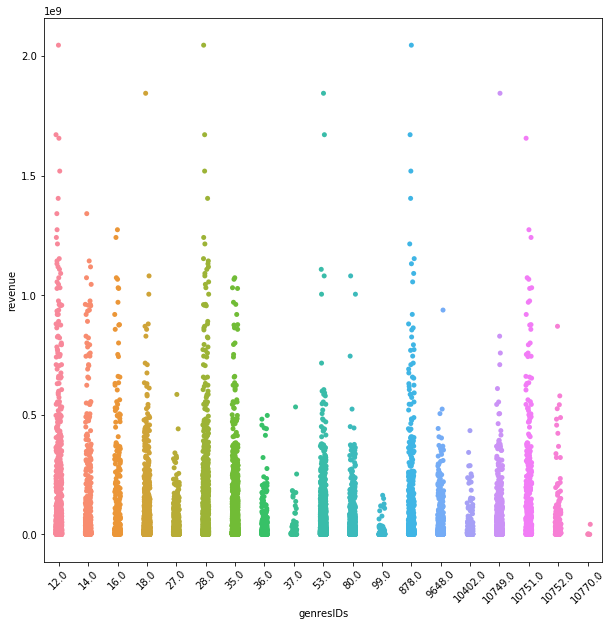

In [21]:
PLT = sns.stripplot(x="genresIDs", y="revenue", data=geners_rev_df)
PLT.set_xticklabels(PLT.get_xticklabels(), rotation=45)
PLT

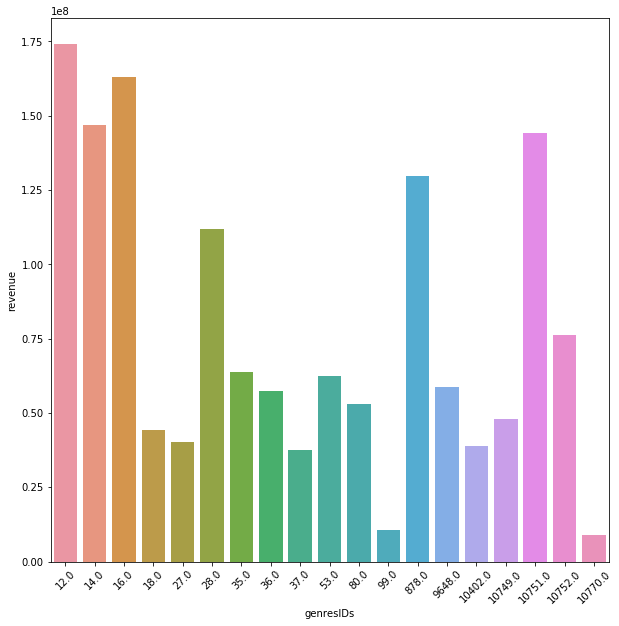

In [22]:
# By mean revenue:
ploted_data = geners_rev_df.groupby('genresIDs').mean().reset_index().sort_values('revenue')
PLT2 = sns.barplot(x="genresIDs", y="revenue", data = ploted_data)
PLT2.set_xticklabels(PLT.get_xticklabels(), rotation=45)
PLT2

### As we can see, on two graphs above, number of movies and film average revenue depends on genre, hence we use genre as categorial feature

# prodCompIDs

In [23]:
cname_cid_df = pd.DataFrame.from_dict(trained_data['companiesIds'], orient='index').reset_index()
cname_cid_df['index'] = cname_cid_df['index'].astype(int)
cname_cid_df['index']
cid_profit_df = pd.DataFrame.from_dict(trained_data['mostProductiveCompanies'], orient='index').reset_index()
cid_profit_df['index'] = cid_profit_df['index'].astype(int)
cid_profit_df['index']
cname_profit = cname_cid_df.merge(cid_profit_df, left_on='index', right_on='index')
cname_profit['Company name'] = cname_profit['0_x']
cname_profit['Films number'] = cname_profit['0_y']
cname_profit = cname_profit.drop('0_x', axis = 1)
cname_profit = cname_profit.drop('0_y', axis = 1)
cname_profit = cname_profit.sort_values(by = 'Films number')
cname_profit

,index,Company name,Films number
2946,3957,Gener8Xion Entertainment,1
3910,3567,Room 9 Entertainment,1
3909,54280,Infinity Media,1
3908,5496,Cinezeta,1
3907,94719,Just Friends Productions,1
...,...,...,...
114,25,20th Century Fox,255
1,5,Columbia Pictures,256
27,4,Paramount,263
13,33,Universal Pictures,339


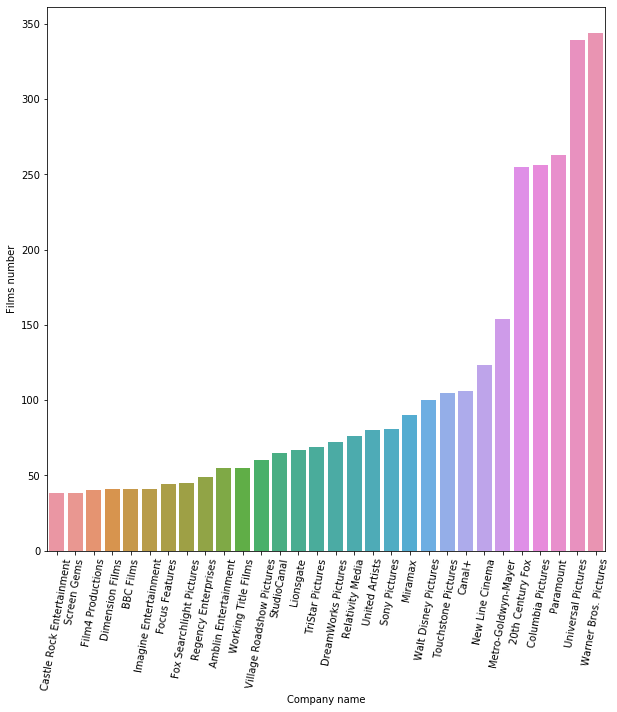

In [24]:
PLT_comp = sns.barplot(x='Company name', y='Films number', data = cname_profit[-30:])
PLT_comp.set_xticklabels(PLT_comp.get_xticklabels(), rotation=80)
pass

On the graph above you can see relation between Video Company and number of movies that it produces. As you can see top5 of this companies produce much more, than the others. Hence, we want to be able to use this information somehow.

# Year and month features
Movies number is growing with time and the same happends to the average revenues, as we can see on the nex two graphs:

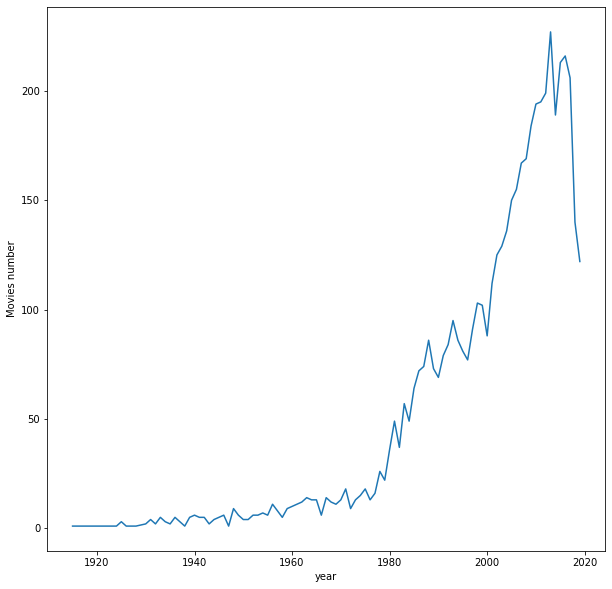

In [25]:
grpd = clear_train_df.groupby(['year']).size().to_frame('size').reset_index()
plt.figure(figsize=(10,10))
PLT01 = sns.lineplot(x="year", y="size", data=grpd)
PLT01.set(ylabel='Movies number')
pass

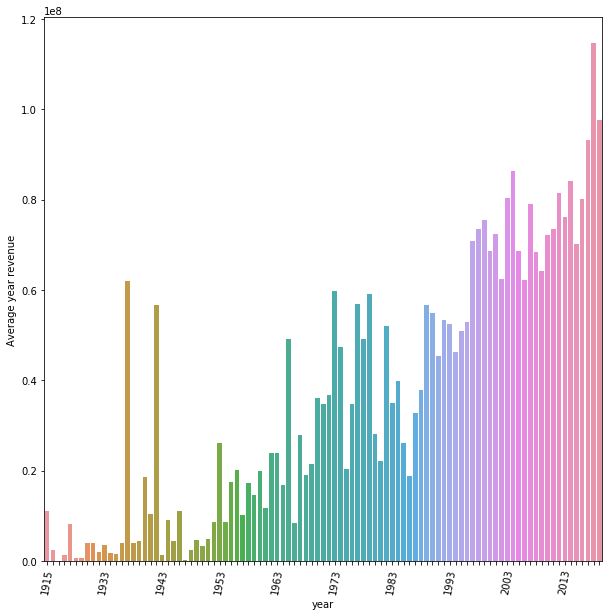

In [26]:
year_revenue_df = clear_train_df[['year', 'revenue']].groupby(['year']).mean().reset_index()
plt.figure(figsize=(10,10))
PLT03 = sns.barplot(x="year", y="revenue", data=year_revenue_df)
# PLT03 = sns.regplot(x="year", y="revenue", data=year_revenue_df)
# PLT03 = sns.stripplot(x="year", y="revenue", data=year_revenue_df)
PLT03.set_xticklabels(PLT03.get_xticklabels(), rotation=80)
PLT03.set(ylabel='Average year revenue')
# PLT03.set_yscale("log")
for ind, label in enumerate(PLT03.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
pass

### On the same time, average revenue isn't even all the times of the year. In order to use this knowledge we use month feature.
Here is the distribution of average revenue by the month of the year

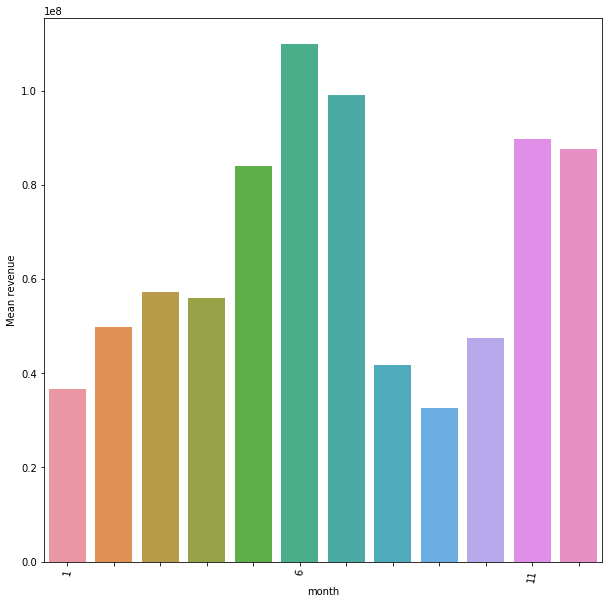

In [27]:
month_revenue_df = clear_train_df[['month', 'revenue']].groupby(['month']).mean().reset_index()
plt.figure(figsize=(10,10))
PLT04 = sns.barplot(x="month", y="revenue", data=month_revenue_df)
PLT04.set_xticklabels(PLT04.get_xticklabels(), rotation=80)
PLT04.set(ylabel='Mean revenue')

for ind, label in enumerate(PLT04.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
pass


# topActorsNum feature
As I already mentioned earlier, this feature represents number of the greatest (most profitable) actors of all time that played a role in this movie. Logic tells that many good actors can bring big box office.

To Prove my point we implemented regression graph, which doesn't look too bad. Also, correlation between revenue and topActorsNum is high.

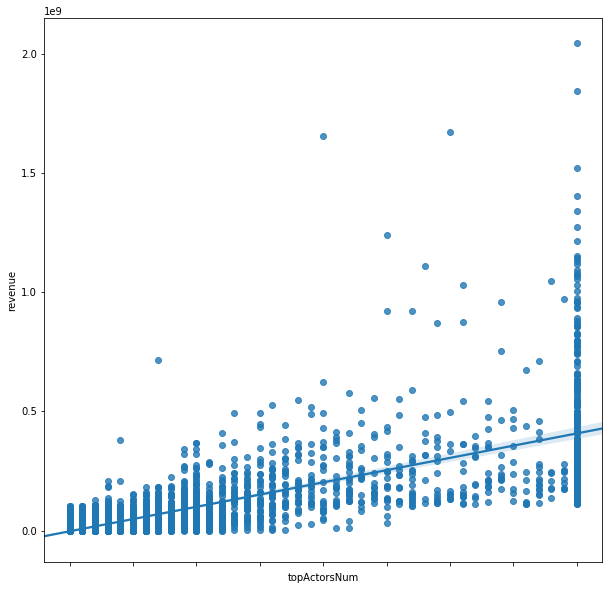

In [28]:
ploted_data = clear_train_df.groupby('topActorsNum').mean().reset_index().sort_values('revenue')
PLT8 = sns.regplot(x="topActorsNum", y="revenue", data= clear_train_df)
PLT8.set_xticklabels(PLT8.get_xticklabels(), rotation=45)
PLT8

# profitableKeywordsNum feature
Just like for topActorsNum we see high correlation between revenue and profitableKeywordsNum
and regression line also looks good.

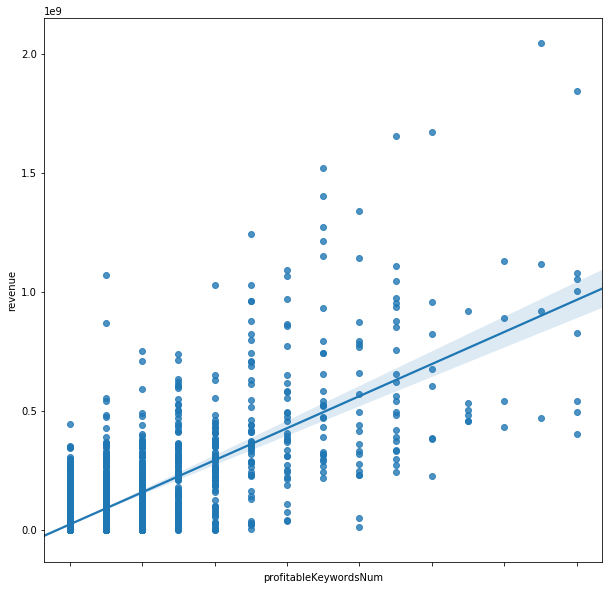

In [29]:
PLT7 = sns.regplot(x="profitableKeywordsNum", y="revenue", data= clear_train_df)
PLT7.set_xticklabels(PLT7.get_xticklabels(), rotation=45)
PLT7

# directorCat feature
As you can see on the graph below bins for the categories are taken in a way, that directors in the same category provide similar revenue on average. This makes the first and the last categories bigger, than others, but also cuts off critical values

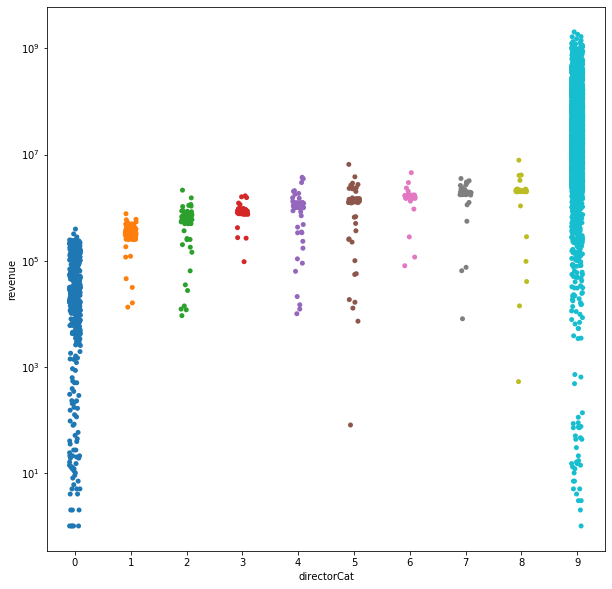

In [30]:
PLT9 = sns.stripplot(x="directorCat", y="revenue", data=clear_train_df)
PLT9.set_yscale("log")

# Handling missing data

function dataCleaning takes care of missing data that appears in the few fields.
However for the current features there is only one field, that can be missing, which is director.
In case, that movie director isn't defined we set it's category to be 5 (which is meadian value when we are talking about directorCat/revenue relation.)

# Prediction

In [31]:
import os
import pickle

In [32]:
def generateFeatures(trained_data, df, cont_features_list, category_list, Train = False):
    X = []
    Features_names = deepcopy(cont_features_list)
    for index, row in df.iterrows():
        Features_names = deepcopy(cont_features_list)
        X.append(list(row[cont_features_list].values))
        # add year avrg revenue
        cur_year = row['year']
        while(cur_year not in trained_data['yearMeanRevenue'].keys()):
            cur_year += 1
        Features_names.append('yearMeanRevenue')
        X[-1].append(trained_data['yearMeanRevenue'][cur_year])
        if('month' in category_list):
            for i in range(12):
                Features_names.append(f'month_{i+1}')
                if(row['month']==i+1):
                    X[-1].append(1)
                else:
                    X[-1].append(0)
        if ('directorCat' in category_list):
            for i in range(len(trained_data['dir_bins'])):
                Features_names.append(f'dirCat_{i}')
                if (row['directorCat'] == i):
                    X[-1].append(1)
                else:
                    X[-1].append(0)
        if('genresIDs' in category_list):
            # print(f'row genres: {row["genresIDs"]}')
            # print(f'genres_dict: {train_dp.genres_dict.items()}')
            for i, id_genre in enumerate(trained_data['genres_dict'].items()):
                Features_names.append(f'genre_{id_genre[0]}')
                if (id_genre[0] in row['genresIDs']):
                    X[-1].append(1)
                else:
                    X[-1].append(0)
        if('companiesIDs' in category_list):
            for cid in trained_data['mostProductiveCompanies'].keys():
                Features_names.append(f'company_{cid}')
                if (cid in row['companiesIDs']):
                    X[-1].append(1)
                else:
                    X[-1].append(0)
    return X

In [33]:
num_feats = ['popularity', 'vote_count', 'isInCollection',
             'profitableKeywordsNum', 'topActorsNum', 'year', ]
cat_feats = ['directorCat', 'month', 'genresIDs', 'companiesIDs']

In [ ]:
train_X = generateFeatures(trained_data, clear_train_df, num_feats, cat_feats)
train_X